In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

import jax 
from jax import numpy as jnp, scipy as jsp

import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.io as pio
import plotly.express as px

from tqdm.autonotebook import tqdm

from rowing.world_rowing import api, fields
from rowing.model.gp import kernels, utils as gp_utils, linalg
from rowing.model.performance import competition_model

# import model

pio.templates.default = "plotly_white"

/tmp/ipykernel_21008/3575264983.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [ ]:
raw_data_url = "https://www.dropbox.com/scl/fi/524zovirdt2a915sd7dlg/2025-World-Rowing-Championships-raw-data.xlsx?rlkey=nsbr0m6esk0c78kgcqpyxo178&st=0rc5ephp&dl=1"
# raw_data_url = "../world_rowing_model/2025 World Rowing Championships-raw-data.xlsx"

In [4]:
raw_data = pd.read_excel(raw_data_url, None, engine='openpyxl')
indexes = {
    'athletes': ['athletes_personId'],
    'results': ['raceBoats_id'],
    'seats': ['athletes_raceBoatId', 'athletes_personId'],
}
for k, names in indexes.items():
    raw_data[k] = raw_data[k].set_index(names)

params = gp_utils.open_params("params.yaml")

  0%|          | 0/5 [00:00<?, ?it/s]

,r2,rmse,mae,Count
Category,,,,
01010,0.426851,0.018707,0.014413,13.0
02010,0.208721,0.030742,0.025725,12.0
03050,0.813008,0.013362,0.010912,11.0
Lightweight,0.887463,0.012764,0.009295,1523.0
Open,0.868350,0.012435,0.009240,4056.0
Overall,0.848836,0.014805,0.010370,6268.0
PR1,0.783914,0.024051,0.018039,262.0
PR2,0.613834,0.028007,0.020159,187.0
PR3,0.641392,0.029912,0.020844,204.0


,r2,rmse,mae,Count
Category,,,,
01010,0.256672,0.017422,0.014999,13.0
02010,-0.055750,0.030604,0.026320,12.0
03050,0.724377,0.012863,0.010647,11.0
Lightweight,0.083900,0.011867,0.008786,1523.0
Open,0.109580,0.011831,0.008937,4056.0
Overall,0.227829,0.014016,0.009974,6268.0
PR1,0.517454,0.022480,0.017451,262.0
PR2,0.182541,0.026544,0.018958,187.0
PR3,0.365731,0.028690,0.020315,204.0


,r2,rmse,mae,Count
Category,,,,
01010,0.443295,0.017815,0.014746,12.0
02010,0.441241,0.014650,0.010817,9.0
03050,0.801987,0.013750,0.011424,11.0
Lightweight,0.927945,0.009934,0.007771,1459.0
Open,0.911294,0.009855,0.007847,3894.0
Overall,0.905110,0.011239,0.008589,5993.0
PR1,0.860321,0.018836,0.014999,249.0
PR2,0.802123,0.018578,0.014287,173.0
PR3,0.792930,0.020612,0.015982,186.0


,r2,rmse,mae,Count
Category,,,,
01010,0.351088,0.015979,0.012830,12.0
02010,0.163264,0.014175,0.011763,9.0
03050,0.697124,0.013484,0.011490,11.0
Lightweight,0.228613,0.009036,0.007122,1459.0
Open,0.248166,0.009299,0.007445,3894.0
Overall,0.381382,0.010454,0.008057,5993.0
PR1,0.665711,0.017757,0.014428,249.0
PR2,0.371697,0.016505,0.012330,173.0
PR3,0.499566,0.018926,0.015017,186.0


,r2,rmse,mae,Count
Category,,,,
01010,0.470863,0.017368,0.014542,12.0
02010,0.696347,0.010494,0.006945,8.0
03050,0.776825,0.014598,0.012616,11.0
Lightweight,0.932647,0.009571,0.007576,1445.0
Open,0.915633,0.009534,0.007650,3862.0
Overall,0.912795,0.010667,0.008304,5932.0
PR1,0.875813,0.017614,0.014295,245.0
PR2,0.841230,0.016261,0.013033,169.0
PR3,0.817111,0.018859,0.014963,180.0


,r2,rmse,mae,Count
Category,,,,
01010,0.374565,0.015688,0.012546,12.0
02010,-0.024640,0.010144,0.005906,8.0
03050,0.652929,0.014435,0.012366,11.0
Lightweight,0.239276,0.008806,0.006966,1445.0
Open,0.260079,0.009015,0.007256,3862.0
Overall,0.398610,0.009994,0.007794,5932.0
PR1,0.687487,0.016730,0.013759,245.0
PR2,0.436444,0.014972,0.011611,169.0
PR3,0.529638,0.017338,0.013789,180.0


,r2,rmse,mae,Count
Category,,,,
01010,0.470990,0.017366,0.014541,12.0
02010,0.697701,0.010471,0.006922,8.0
03050,0.775471,0.014642,0.012770,11.0
Lightweight,0.934731,0.009383,0.007468,1437.0
Open,0.916290,0.009492,0.007621,3854.0
Overall,0.913852,0.010588,0.008256,5915.0
PR1,0.875800,0.017615,0.014297,245.0
PR2,0.841140,0.016266,0.013029,169.0
PR3,0.822175,0.018582,0.014833,179.0


,r2,rmse,mae,Count
Category,,,,
01010,0.375443,0.015676,0.012540,12.0
02010,-0.021340,0.010128,0.005885,8.0
03050,0.650918,0.014476,0.012515,11.0
Lightweight,0.248606,0.008690,0.006889,1437.0
Open,0.252616,0.008985,0.007233,3854.0
Overall,0.398733,0.009939,0.007756,5915.0
PR1,0.687486,0.016730,0.013760,245.0
PR2,0.436364,0.014973,0.011608,169.0
PR3,0.535854,0.017065,0.013602,179.0


,r2,rmse,mae,Count
Category,,,,
01010,0.471071,0.017365,0.014540,12.0
02010,0.697773,0.010470,0.006915,8.0
03050,0.775472,0.014642,0.012769,11.0
Lightweight,0.935261,0.009340,0.007449,1436.0
Open,0.916781,0.009463,0.007608,3852.0
Overall,0.914238,0.010564,0.008244,5912.0
PR1,0.875785,0.017616,0.014297,245.0
PR2,0.840948,0.016276,0.013043,169.0
PR3,0.822184,0.018582,0.014832,179.0


,r2,rmse,mae,Count
Category,,,,
01010,0.375569,0.015675,0.012539,12.0
02010,-0.021189,0.010127,0.005885,8.0
03050,0.650927,0.014476,0.012514,11.0
Lightweight,0.253869,0.008657,0.006872,1436.0
Open,0.253994,0.008957,0.007214,3852.0
Overall,0.400403,0.009916,0.007740,5912.0
PR1,0.687465,0.016731,0.013761,245.0
PR2,0.435869,0.014980,0.011616,169.0
PR3,0.535799,0.017066,0.013602,179.0


<Axes: xlabel='leave_one_out', ylabel='PGMT'>

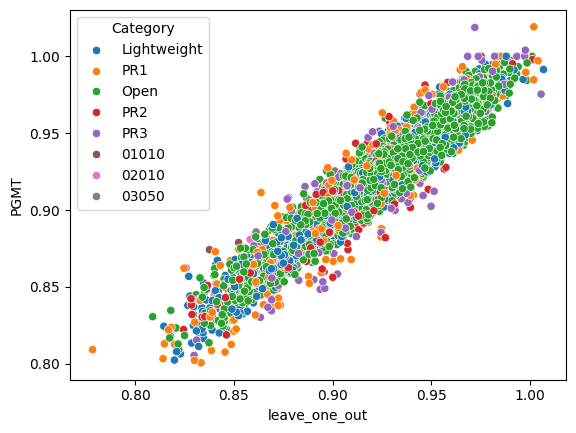

In [6]:
filtered_data = raw_data.copy()
train_data = raw_data['results']
train_data['difference'] = 0. 

for i in tqdm(range(5)):
    filtered_results = train_data[
        (
            (train_data['difference'] > -0.025)
            | train_data.Category.str.contains('PR')
        )
        & (train_data['difference'] > -0.05)
    ]
    filtered_data['results'] = filtered_results[
        filtered_results.groupby('race_id').transform('size') > 1
    ]
    comp_model = competition_model.PerformanceModel.from_data(
        **filtered_data, 
    )
    train_data = comp_model.metadata['results'].copy()

    kernel = gp_utils.transform(comp_model.get_jitter_kernel)
    K = kernel.apply(params)
    system = gp_utils.GPSystem.from_cholesky(
        np.linalg.cholesky(K), comp_model.y)

    train_data['leave_one_out'] = y_loo = np.array(system.leave_one_out())
    train_data['difference'] = train_data['PGMT'] - train_data['leave_one_out']
    for c, v in (
        train_data[['PGMT', 'leave_one_out']] 
        - train_data.groupby('race_id')[['PGMT', 'leave_one_out']].transform('mean')
    ).add_prefix("Relative ").items():
        train_data[c] = v

    cat_groups = pd.concat([
        train_data, 
        train_data.assign(Category='Overall')
    ]).groupby('Category')
    pgmt_metrics = cat_groups.apply(
        lambda data: pd.Series({
            'r2': metrics.r2_score(data['PGMT'], data['leave_one_out']), 
            'rmse': metrics.mean_squared_error(data['PGMT'], data['leave_one_out'])**0.5, 
            'mae': metrics.mean_absolute_error(data['PGMT'], data['leave_one_out']), 
            'Count': len(data), 
        }), 
        include_groups=False
    )
    rel_metrics = cat_groups.apply(
        lambda data: pd.Series({
            'r2': metrics.r2_score(data['Relative PGMT'], data['Relative leave_one_out']), 
            'rmse': metrics.mean_squared_error(data['Relative PGMT'], data['Relative leave_one_out'])**0.5, 
            'mae': metrics.mean_absolute_error(data['Relative PGMT'], data['Relative leave_one_out']), 
            'Count': len(data), 
        }), 
        include_groups=False
    )
    display(pgmt_metrics, rel_metrics)

f, ax = plt.subplots()
sns.scatterplot(
    train_data, 
    x='leave_one_out', y='PGMT', hue='Category',
)

## Generate Model Posterior Predictions

In [7]:
competition = raw_data['competition'].set_index('key').value
competitors = raw_data['competitors']

start_date = pd.to_datetime(competition['Competition Start Date'])
start = (
    start_date.year
    + start_date.dayofyear 
    / pd.Timestamp(start_date.year, 12, 31).dayofyear
)
y_ath, cov_ath = competition_model.predict_athletes_score(
    comp_model, start, params, system)
y_boat, cov_boat = competition_model.predict_boat_scores(
    y_ath, cov_ath, 
    competitors, 
    comp_model.metadata['weights']['athlete'].columns, 
    noise = np.exp(params['~']['log_noise'])
)
v = gp_utils.transform(competition_model.boatclass_kernel).apply(params, 1)
boat_class = system.a @ (v.item() * comp_model.metadata['weights']['Boat Class'])

boat_class.sort_values()

Boat Class
PR1 W1x      0.874455
PR1 M1x      0.880354
PR3 Mix2x    0.904271
PR2 M1x      0.909090
PR3 Mix4+    0.910184
W1x          0.913215
PR3 M2-      0.913887
PR3 W2-      0.917872
M1x          0.919466
PR2 W1x      0.920827
W2-          0.921042
PR2 Mix2x    0.921213
M2-          0.922505
M4-          0.923545
LW2x         0.924591
W4x          0.925481
W4-          0.926240
W2x          0.928184
LM2-         0.928570
M2x          0.929173
LM1x         0.930373
LW1x         0.930925
W8+          0.931076
LM2x         0.933091
M4x          0.933912
M8+          0.937357
LW4x         0.939710
LM4x         0.946272
LW2-         0.950427
dtype: float64

## Simulate finish positions of crews

In [8]:
crews = raw_data['crews']

np.random.seed(1)
n_samples = 100_000
event_ranks = {}

for event, event_boats in crews.groupby("Event"):
    y_event = y_boat.loc[event_boats.id]
    cov_event = cov_boat.loc[event_boats.id, event_boats.id]
    mvn = stats.multivariate_normal(y_event.values, cov_event.values)
    ranks = pd.DataFrame(
        stats.rankdata(- mvn.rvs(size=n_samples), axis=1), 
        columns=event_boats.id
    ).apply(
        pd.Series.value_counts
    ).fillna(0).T
    event_ranks[event] = rank_prob = ranks / ranks.values.sum(1, keepdims=True)

event_ranks = pd.concat(event_ranks, names=['event', 'boatId'])
event_ranks.columns = event_ranks.columns.astype(int)

exp_score = event_ranks[range(1, 7)].fillna(0) @ np.arange(6, 0, -1)

athlete_preds = competitors[
    ['person.DisplayName', 'person.FirstName', 'person.LastName', 'athletePosition', 'boatId']
].join(
    crews.set_index("id").DisplayName.str[:3].rename("Country"), on='boatId'
).join(
    exp_score.rename("exp_score").reset_index().set_index('boatId'), on='boatId',
)
athlete_preds.to_csv(
    f"{competition.competition}-athlete_pred_scores.csv", index=False)

boat_ranks = crews.join(
    event_ranks.droplevel(0), on='id'
).sort_values(['Boat Type', 1], ascending=False).set_index(['Boat Type', 'Country'])[
    event_ranks.columns
]

exp_finish = (boat_ranks.fillna(0) @ boat_ranks.columns.astype(int))
exp_rank = exp_finish.groupby(level=0).rank().astype(int)
boat_rank = crews.set_index(
    ['Boat Type', 'DisplayName']
)['finalRank'].rename_axis(
    boat_ranks.index.names
)

win_prob_rank = boat_ranks[1].groupby(level=0).rank(ascending=False).astype(int)

winner = win_prob_rank[
    boat_rank == 1
].rename('Predicted').to_frame().join(
    boat_ranks[1].rename('Prob')
).reset_index(1)

favourites = boat_ranks[1].groupby(level=0).apply(
    lambda x: x[[x.idxmax()]].droplevel(0)
).rename('Prob').to_frame().join(
    boat_rank.dropna().astype(int).rename('Finish')
).reset_index(1)[
    ['Country', 'Finish', 'Prob']
]
favourite_comparison = pd.concat({
    'Winner': winner.assign(
        probability=winner.Prob.map("{:.1%}".format)
    ), 
    'Model Favourite': favourites.assign(
        probability=favourites.Prob.map("{:.1%}".format)
    ),
}, axis=1).rename_axis('Event').sort_values(
    ('Winner', 'Prob'), ascending=False
).drop('Prob', axis=1, level=1)

print(
    favourite_comparison.to_latex().replace("%", "\%")
)
favourite_comparison

\begin{tabular}{llrllrl}
\toprule
 & \multicolumn{3}{r}{Winner} & \multicolumn{3}{r}{Model Favourite} \\
 & Country & Predicted & probability & Country & Finish & probability \\
Event &  &  &  &  &  &  \\
\midrule
PR1 W1x & UKR & 1 & 98.3\% & UKR & 1 & 98.3\% \\
PR3 Mix4+ & GBR & 1 & 72.2\% & GBR & 1 & 72.2\% \\
PR1 M1x & GBR & 1 & 42.0\% & GBR & 1 & 42.0\% \\
W2- & ROU & 1 & 39.8\% & ROU & 1 & 39.8\% \\
M4x & ITA & 1 & 37.4\% & ITA & 1 & 37.4\% \\
PR2 Mix2x & CHN & 1 & 37.0\% & CHN & 1 & 37.0\% \\
Mix8+ & ROU & 1 & 36.3\% & ROU & 1 & 36.3\% \\
PR3 Mix2x & GER & 1 & 33.6\% & GER & 1 & 33.6\% \\
W8+ & NED & 1 & 27.7\% & NED & 1 & 27.7\% \\
LW2x & CHN & 2 & 26.0\% & INA & 5 & 50.0\% \\
M2x & POL & 2 & 20.8\% & ROU & 6 & 23.7\% \\
LW1x & USA & 2 & 18.8\% & IRL & 4 & 25.5\% \\
LM2x & CHN & 3 & 18.3\% & GEO & 4 & 49.9\% \\
LM1x & URU & 2 & 17.6\% & GER & 4 & 17.8\% \\
W1x & IRL & 2 & 16.3\% & GBR & 2 & 43.3\% \\
W4x & NED & 2 & 15.5\% & GBR & 2 & 29.3\% \\
M8+ & NED & 3 & 15.0\% & GBR & 2 &

Winner                       Model Favourite                   
          Country Predicted probability         Country Finish probability
Event                                                                     
PR1 W1x       UKR         1       98.3%             UKR      1       98.3%
PR3 Mix4+     GBR         1       72.2%             GBR      1       72.2%
PR1 M1x       GBR         1       42.0%             GBR      1       42.0%
W2-           ROU         1       39.8%             ROU      1       39.8%
M4x           ITA         1       37.4%             ITA      1       37.4%
PR2 Mix2x     CHN         1       37.0%             CHN      1       37.0%
Mix8+         ROU         1       36.3%             ROU      1       36.3%
PR3 Mix2x     GER         1       33.6%             GER      1       33.6%
W8+           NED         1       27.7%             NED      1       27.7%
LW2x          CHN         2       26.0%             INA      5       50.0%
M2x           POL         2       20.8%             ROU      6       23.7%
LW1x          USA         2       18.8%             IRL      4       25.5%
LM2x          CHN         3       18.3%             GEO      4       49.9%
LM1x          URU         2       17.6%             GER      4       17.8%
W1x           IRL         2       16.3%             GBR      2       43.3%
W4x           NED         2       15.5%             GBR      2       29.3%
M8+           NED         3       15.0%             GBR      2       33.7%
W2x           NED         5       13.4%             CHN      2       17.8%
M2-           NZL         2       13.3%             ROU      2       35.9%
W4-           USA         4       12.8%             NED      4       30.8%
Mix2x         IRL         2       11.3%             NED      2       41.8%
M4-           GBR         4        8.9%             NED      3       24.1%
M1x           GRE         5        6.4%             GER      2       24.6%

## Compare predicted score of crews against PGMTs

\begin{tabular}{llll}
\toprule
 & r2 & RMSE & MAE \\
Phase &  &  &  \\
\midrule
Any & 27.1\% & 2.4\% & 1.5\% \\
Final A & 14.9\% & 2.7\% & 1.6\% \\
Final B & 3.5\% & 2.0\% & 1.5\% \\
Final C & 16.3\% & 1.2\% & 0.9\% \\
Final D & 15.6\% & 3.1\% & 2.5\% \\
Final E & 0.0\% & 5.5\% & 3.9\% \\
Heat & 40.4\% & 2.3\% & 1.5\% \\
Lightweight & 9.0\% & 2.4\% & 1.6\% \\
Open & 24.8\% & 1.9\% & 1.2\% \\
Para & 34.5\% & 4.2\% & 3.0\% \\
Preliminary & 17.3\% & 6.3\% & 4.7\% \\
Quarterfinal & 43.0\% & 1.3\% & 1.1\% \\
Semifinal A/B & 36.8\% & 1.7\% & 1.2\% \\
\bottomrule
\end{tabular}



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Relative PGMT   R-squared (uncentered):                   0.295
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              299.6
Date:                Thu, 02 Oct 2025   Prob (F-statistic):                    2.48e-56
Time:                        18:53:56   Log-Likelihood:                          1677.7
No. Observations:                 717   AIC:                                     -3353.
Df Residuals:                     716   BIC:                                     -3349.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Relative score     1.3955      0.081     17.308      0.000       1.237       1.554
==============================================================================
Omnibus:                      327.186   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2978.218
Skew:                          -1.820   Prob(JB):                         0.00
Kurtosis:                      12.297   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,r2,RMSE,MAE
Phase,,,
Any,0.271284,0.023698,0.015135
Final A,0.149279,0.026681,0.016162
Final B,0.034936,0.020373,0.014827
Final C,0.163218,0.012064,0.009294
Final D,0.155725,0.031212,0.025079
Final E,0.000000,0.054631,0.038613
Heat,0.403867,0.022537,0.014642
Lightweight,0.090048,0.023959,0.016395
Open,0.248203,0.018816,0.012348


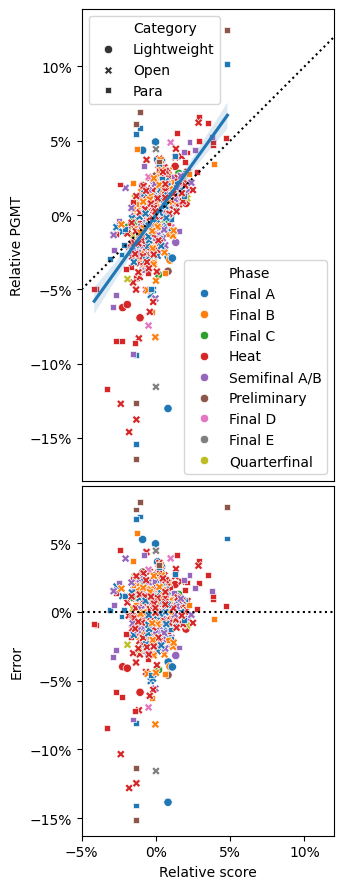

In [9]:
comp_results = raw_data['races'].join(
    y_boat.rename('score'), on='boatId'   
).dropna(
    subset=['score', 'PGMT']
)
comp_results['Category'] = comp_results['Boat Class'].str.extract(
    "([a-zA-Z]+)"
).map({
    'M': 'Open', 'W': 'Open', 'Mix': 'Open', 
    'PR': 'Para', 
    'LM': 'Lightweight', 'LW': 'Lightweight'
}.get)

result_diff = comp_results.join((
    comp_results[['PGMT', 'score']] 
    - comp_results.groupby('race_id')[['PGMT', 'score']].transform('mean')
).add_prefix("Relative "))
result_diff['Error'] = result_diff['Relative PGMT'] - result_diff['Relative score']

pgmt_metrics = pd.concat([
    result_diff, 
    result_diff.assign(Phase='Any'),
    result_diff.assign(Phase=result_diff.Category),
]).groupby(['Phase']).apply(
    lambda data: pd.Series({
        'r2': metrics.r2_score(data['Relative PGMT'], data['Relative score']), 
        'RMSE': metrics.mean_squared_error(data['Relative PGMT'], data['Relative score'])**0.5, 
        'MAE': metrics.mean_absolute_error(data['Relative PGMT'], data['Relative score']), 
    }), 
    include_groups=False
)

f, ax = plt.subplots(1, figsize=(4.5, 9))
# ax= axes[0]
sns.scatterplot(
    result_diff, 
    x='Relative score', y='Relative PGMT', hue='Phase', style='Category', 
    ax=ax, 
    # legend=False, 
)
sns.regplot(
    result_diff, 
    x='Relative score', y='Relative PGMT', 
    scatter=False, 
    ax=ax
)
xlim = [-0.05, 0.12]
ax.set_xlim(*xlim)
ax.plot(xlim, xlim, c='k', ls=':')

# ax.set_ylim(-.2, .15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0, xmax=1))
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0, xmax=1))
ax.set_aspect('equal')
ax.xaxis.set_visible(False)


handles, labels = ax.get_legend_handles_labels()
split_at = labels.index('Category')
l1 = ax.legend(
    handles=handles[:split_at], labels=labels[:split_at], 
    loc='lower right', 
)
ax.add_artist(l1)
ax.legend(
    handles=handles[split_at:], labels=labels[split_at:], 
    loc='upper left', 
)

divider = make_axes_locatable(ax)
ax = divider.append_axes('bottom', 3.5, sharex=ax, pad=0.05)

# ax= axes[1]
sns.scatterplot(
    result_diff, 
    x='Relative score', y='Error', hue='Phase', style='Category', 
    ax=ax, 
    legend=False, 
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0, xmax=1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0, xmax=1))
ax.axhline(0, ls=':', c='k')

f.tight_layout()

f.savefig(f"{competition.competition}-performance.pdf")

print(
    pgmt_metrics.map("{:.1%}".format).to_latex().replace("%", "\%")
)

model = sm.OLS(
    result_diff['Relative PGMT'], 
    result_diff['Relative score'].to_frame()
)
res = model.fit()
display(res.summary())

pgmt_metrics

## Compare Rank

\begin{tabular}{llllll}
\toprule
 & 1 & 2 & 3 & 4 & 5 \\
\midrule
AUC & 91.9\% & 79.9\% & 77.6\% & 73.1\% & 63.2\% \\
r2 & 21.8\% & 7.4\% & 5.9\% & 5.3\% & 3.5\% \\
Accuracy & 90.6\% & 88.6\% & 86.0\% & 85.3\% & 87.1\% \\
Sensitivity & 39.1\% & 26.1\% & 8.7\% & 4.3\% & 13.6\% \\
Specificity & 94.9\% & 93.8\% & 92.4\% & 92.0\% & 93.0\% \\
\bottomrule
\end{tabular}



,1,2,3,4,5
AUC,91.9%,79.9%,77.6%,73.1%,63.2%
r2,21.8%,7.4%,5.9%,5.3%,3.5%
Accuracy,90.6%,88.6%,86.0%,85.3%,87.1%
Sensitivity,39.1%,26.1%,8.7%,4.3%,13.6%
Specificity,94.9%,93.8%,92.4%,92.0%,93.0%


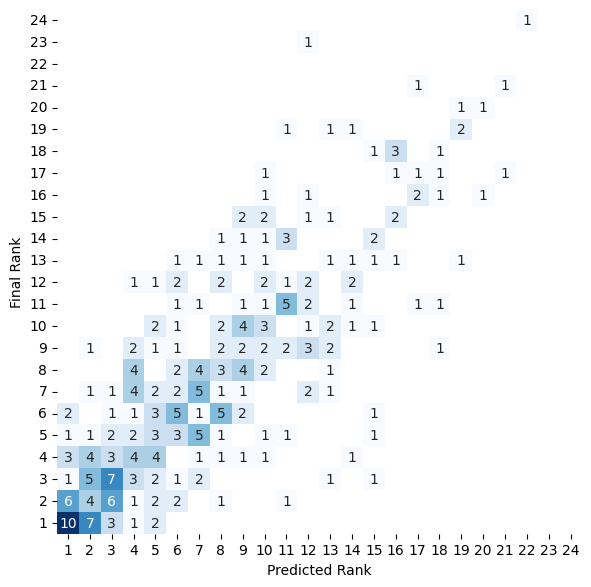

In [10]:
def class_report(y_obs, y_pred):
    report = metrics.classification_report(
        y_obs, y_pred == y_pred.groupby(level=0).transform('max'), 
        output_dict=True
    )
    report['AUC'] = metrics.roc_auc_score(y_obs, y_pred)
    report['r2'] = y_pred.groupby(y_obs).mean().diff().loc[True]
    return pd.json_normalize(report).loc[0]

boat_rank = crews.set_index(['Boat Type', 'DisplayName'])['finalRank']
pos_reports = {
    i: class_report(
        *(boat_rank == i).dropna().rename_axis(boat_ranks.index.names).align(
            boat_ranks[i].dropna(), join='inner')
    )
    for i in range(1, 6)
}
pos_reports = pd.concat(pos_reports).unstack(0).rename(index={
    'accuracy': 'Accuracy', 
    'False.recall': 'Specificity', 
    'True.recall': 'Sensitivity', 
})
print(pos_reports.loc[
    ['AUC', 'r2', 'Accuracy', 'Sensitivity', 'Specificity']
].map("{:.1%}".format).to_latex().replace("%", "\%"))


final_rank, exp_rank = boat_rank.rename_axis(
    exp_rank.index.names
).dropna().astype(int).align(
    exp_rank.dropna().astype(int), join='inner'
)
cmp = pd.concat({
    'Final Rank': final_rank, 'Predicted Rank': exp_rank}, 
    axis=1
)
rank_mat = cmp.value_counts().unstack()

f, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(
    rank_mat.loc[:24, :24].sort_index(ascending=False), 
    square=True, 
    cbar=False, 
    fmt='.0f', 
    annot=True, 
    # cmap='gist_heat_r', vmax=20, 
    cmap='Blues',
    # linewidths=0.5, linecolor='k' 
)
ax.set_yticklabels(
    # ax.get_yticks(), 
    ax.get_yticklabels(), 
    rotation=0, 
)
f.tight_layout()
f.savefig(f"{competition.competition}-heatmap.pdf")

pos_reports.loc[
    ['AUC', 'r2', 'Accuracy', 'Sensitivity', 'Specificity']
].style.format("{:.1%}".format)

(0.0, 1.0)

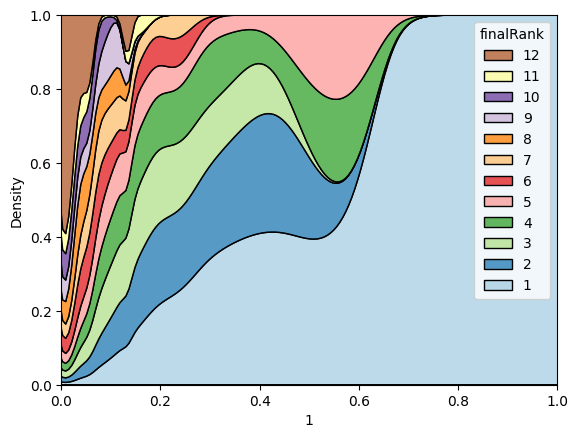

In [11]:
sns.kdeplot(
    x=boat_ranks[1],
    hue=boat_rank.where(boat_rank < 12, 12).astype(int).astype('category'), 
    hue_order=np.arange(1, 13)[::-1],
    # bins=boat_ranks[1].quantile(np.linspace(0, 1, 9)), 
    # bins=np.r_[0, np.exp(np.arange(0, 4, 0.5) - 4), 1],
    multiple='fill', 
    palette='Paired_r', 
    # linewidth=0, 
)
plt.xlim(0, 1)

Text(0.5, 0, 'Win Probability')

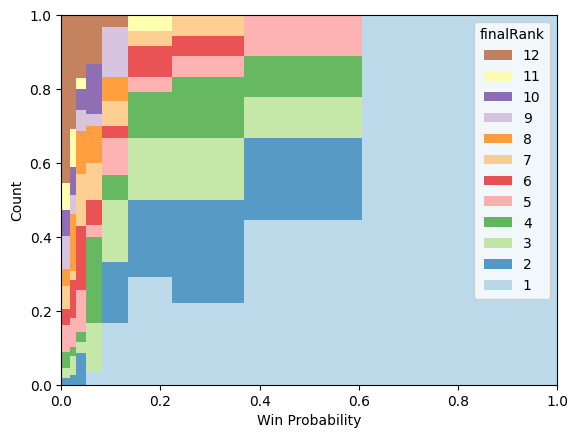

In [12]:
sns.histplot(
    x=boat_ranks[1],
    hue=boat_rank.where(boat_rank < 12, 12).astype(int).astype('category'), 
    hue_order=np.arange(1, 13)[::-1],
    # bins=boat_ranks[1].quantile(np.linspace(0, 1, 9)), 
    bins=np.r_[0, np.exp(np.arange(0, 4, 0.5) - 4), 1],
    multiple='fill', 
    palette='Paired_r', 
    linewidth=0, 
)
plt.xlabel("Win Probability")

In [13]:
diff = abs(
    cmp.diff(axis=1)['Predicted Rank']
).value_counts(normalize=False).reindex(
    np.arange(0, 21), fill_value=0)
diff

Predicted Rank
0     62
1     76
2     51
3     32
4     28
5     19
6     14
7      5
8      2
9      3
10     3
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
Name: count, dtype: int64

,frac,cumfrac
Predicted Rank,,
0,20.8%,20.8%
1,25.5%,46.3%
2,17.1%,63.4%
3,10.7%,74.2%
4,9.4%,83.6%
5,6.4%,89.9%
6,4.7%,94.6%
7,1.7%,96.3%
8,0.7%,97.0%


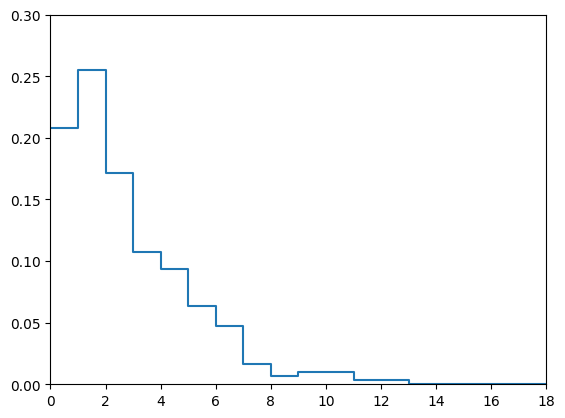

In [14]:
diff = abs(
    cmp.diff(axis=1)['Predicted Rank']
).value_counts(normalize=True).reindex(
    np.arange(0, 21), fill_value=0)
plt.step(
    diff.index, diff, where='post', 
)
plt.xlim(0, 18)
plt.ylim(0, 0.3)
pd.concat({
    'frac': diff,
    'cumfrac': diff.cumsum()
}, axis=1).map("{:.1%}".format)